**Fake News Detection Report**

1. Introduction
Objective: To classify news articles as either real or fake using machine learning techniques.
Data: Two datasets of approximately 20,000 articles each (real and fake news).
Tools Used: Python for data processing, analysis, and model building.
2. Data Overview
Datasets: Fake.csv and True.csv
Columns: Title, Text, Subject, Date (assuming this structure from the typical news dataset).
Data Distribution: A bar chart or pie chart of real vs. fake news articles.
3. Data Preprocessing
Text Cleaning:
Remove stop words.
Lemmatization/Stemming.
Remove punctuation, numbers, and special characters.
Vectorization:
Use TF-IDF (Term Frequency-Inverse Document Frequency) or Count Vectorizer to convert text data into numerical format.
4. Exploratory Data Analysis (EDA)
Word Cloud: Visual representation of common words in fake and real news articles.
Sentiment Analysis: Show the distribution of positive, negative, and neutral sentiments.
N-gram Analysis:
Unigrams and bigrams analysis with charts (histogram, bar plots) showing the frequency of most common terms.
5. Model Building
Machine Learning Models Used:
Logistic Regression
Random Forest Classifier
Support Vector Machines (SVM)
Data Split:
Split into training and testing sets (80% train, 20% test).
Feature Engineering: Include n-gram features and sentiment scores.
6. Model Evaluation
Metrics:
Accuracy
Precision, Recall, F1-Score
ROC-AUC Curve
Comparison of Models: Present a table comparing the models' performances on key metrics.
Confusion Matrix: Visual representation of the true positive, false positive, true negative, and false negative results.
7. Deployment Strategy
Deployment:
Streamlit for building a web application where users can input news articles to predict if they are real or fake.

**Data Overview**

In [1]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
true_news = pd.read_csv('/content/drive/MyDrive/True.csv', encoding = 'latin-1', on_bad_lines = 'skip')
fake_news = pd.read_csv('/content/drive/MyDrive/Fake.csv', encoding ='latin-1', on_bad_lines ='skip')

In [5]:
true_news.shape, fake_news.shape

((21416, 4), (23481, 4))

In [6]:
true_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21416 entries, 0 to 21415
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21416 non-null  object
 1   text     21416 non-null  object
 2   subject  21416 non-null  object
 3   date     21416 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [7]:
fake_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [8]:
true_news.describe()

,title,text,subject,date
count,21416,21416,21416,21416
unique,20825,21191,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11271,182


In [9]:
fake_news.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [10]:
true_news["class"] = 1
fake_news["class"] = 0

In [11]:
  fake_news_manual_testing = fake_news.tail(10)
  fake_news = fake_news.drop(fake_news.tail(10).index, inplace=False)


  true_news_manual_testing = true_news.tail(10)
  true_news = true_news.drop(true_news.tail(10).index, inplace=False)


In [12]:
true_news_manual_testing['class'] = 1
fake_news_manual_testing['class'] = 0

In [13]:
true_news_manual_testing.head()

,title,text,subject,date,class
21406,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21407,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21410,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1


In [14]:
fake_news_manual_testing.tail()

,title,text,subject,date,class
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied Safe Zone Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [15]:
data_merge = pd.concat([true_news, fake_news], axis=0)


In [16]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44877 entries, 0 to 23470
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44877 non-null  object
 1   text     44877 non-null  object
 2   subject  44877 non-null  object
 3   date     44877 non-null  object
 4   class    44877 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [17]:
data_merge.describe()

,class
count,44877.000000
mean,0.476993
std,0.499476
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [18]:
data_merge.shape

(44877, 5)

In [19]:
data_merge.isnull().sum()

,0
title,0
text,0
subject,0
date,0
class,0


In [20]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [21]:
  data = data_merge.drop(['title', 'subject', 'date'], axis=1)
  data.head()

,text,class
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


In [22]:
data = data.sample(frac=1)
data.head()

,text,class
18366,BERLIN (Reuters) - It is important for Spain t...,1
3634,"Breitbart News, the right wing hate site that ...",0
5000,"Hi folks, John Harper here, at least if you as...",0
12109,,0
3447,SHANGHAI (Reuters) - Chinas state news agency...,1


In [23]:
data.reset_index(inplace=True)
data.drop(['index'], axis=1, inplace=True)

In [24]:
data.columns

Index(['text', 'class'], dtype='object')

In [25]:
data.head()

,text,class
0,BERLIN (Reuters) - It is important for Spain t...,1
1,"Breitbart News, the right wing hate site that ...",0
2,"Hi folks, John Harper here, at least if you as...",0
3,,0
4,SHANGHAI (Reuters) - Chinas state news agency...,1


**Data Preprocessing**

In [26]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters
    text = text.split()
    text = [word for word in text if word not in stop_words]  # Remove stopwords
    text = [lemmatizer.lemmatize(word) for word in text]  # Lemmatization
    return ' '.join(text)

data['cleaned_text'] = data['text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [27]:
# Train-Test split
X = data['cleaned_text']
y = data['class']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Vectorization
vectorizer = TfidfVectorizer()
X_train_vector = vectorizer.fit_transform(X_train)
X_test_vector = vectorizer.transform(X_test)

**Exploratory Data Analysis**

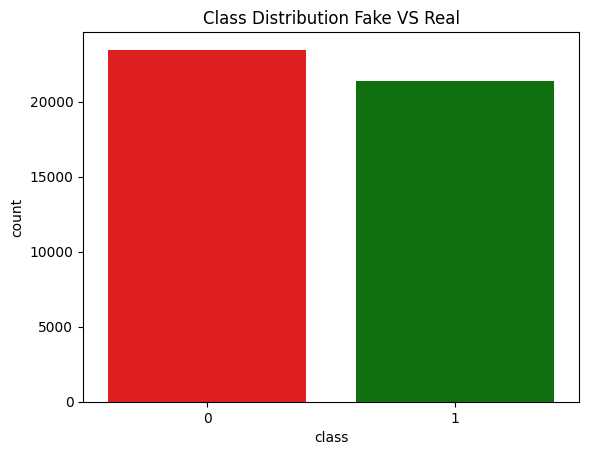

In [30]:
sns.countplot(x='class', data=data, palette=['red', 'green'])
plt.title('Class Distribution Fake VS Real')
plt.show()                                # (1==True News , 0==Fake News)

In [31]:
#Sentiment analysis
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

data['sentiment'] = data['cleaned_text'].apply(get_sentiment)

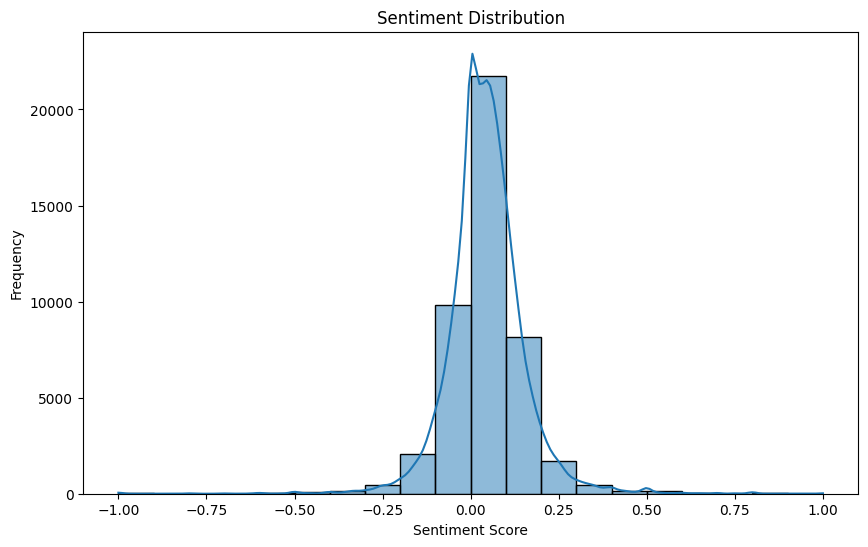

In [32]:
# Visualize Sentiment
plt.figure(figsize=(10, 6))
sns.histplot(data['sentiment'], bins=20, kde=True)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [33]:
#N-gram Analysis
from sklearn.feature_extraction.text import CountVectorizer

def plot_ngrams(n, data):
  vectorizer = CountVectorizer(ngram_range=(n, n), max_features=20)
  ngrams = vectorizer.fit_transform(data)
  ngram_counts = ngrams.sum(axis=0).A1
  ngram_features = vectorizer.get_feature_names_out()

  ngram_df = pd.DataFrame({'ngram': ngram_features, 'count': ngram_counts})
  ngram_df = ngram_df.sort_values(by='count', ascending=False)

  plt.figure(figsize=(10, 6))
  sns.barplot(x='count', y='ngram', data=ngram_df, palette='viridis')
  plt.title(f'Top {n}-grams')
  plt.show()

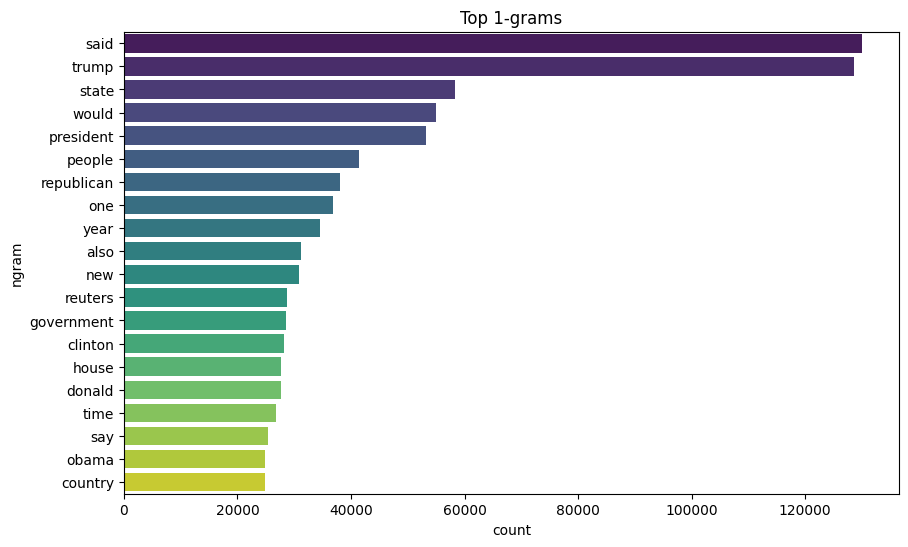

In [34]:
plot_ngrams(1, data['cleaned_text'])

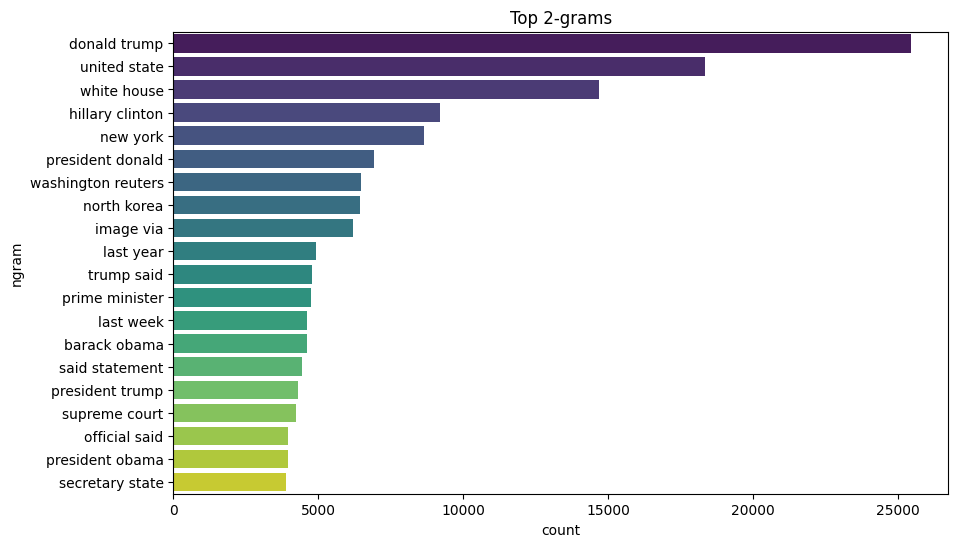

In [35]:
plot_ngrams(2, data['cleaned_text'])

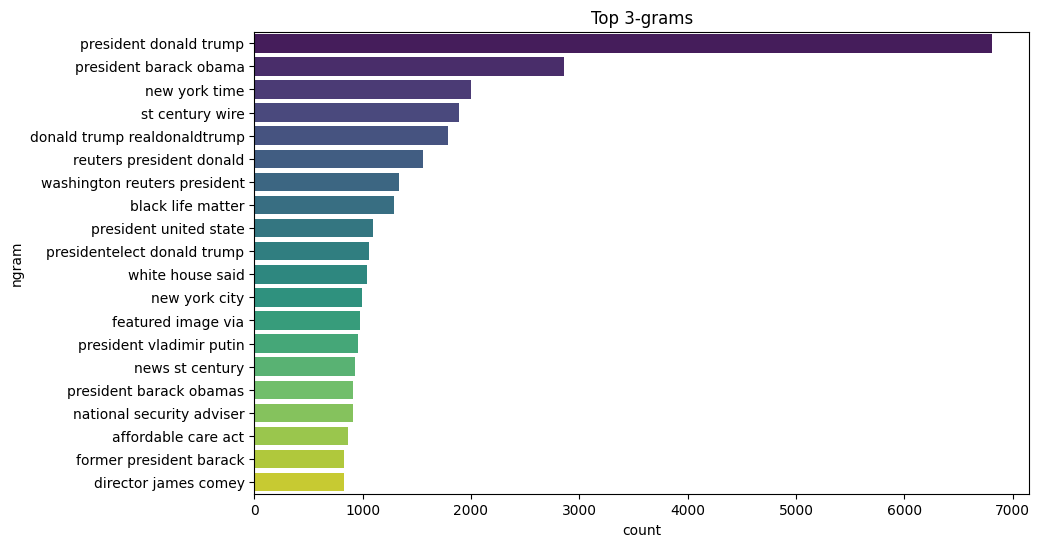

In [36]:
plot_ngrams(3, data['cleaned_text'])

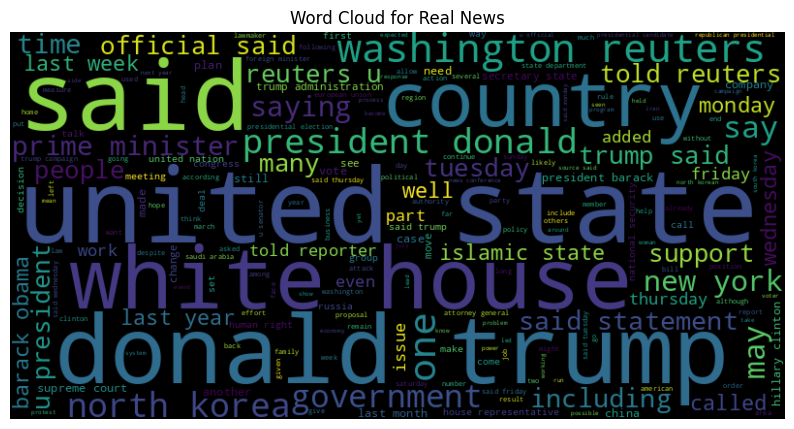

In [37]:
# wordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# WordCloud For Real News
real_text = ' '.join(data[data['class'] == 1]['cleaned_text'])
wordcloud = WordCloud(width=800, height=400).generate(real_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Real News')
plt.axis('off')
plt.show()

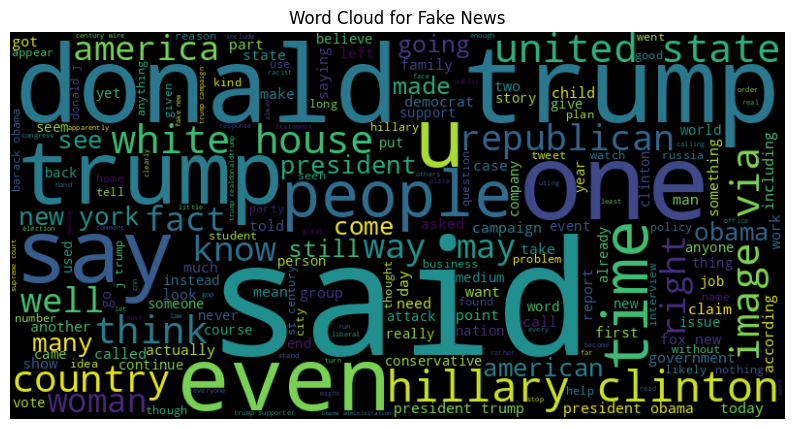

In [38]:
# WordCloud for Fake News
fake_text = ' '.join(data[data['class'] == 0]['cleaned_text'])
wordcloud = WordCloud(width=800, height=400).generate(fake_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Fake News')
plt.axis('off')
plt.show()

**Model Building**

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
  # X = data['cleaned_text']
  # y = data['class']
  # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  # vectorizer = TfidfVectorizer()
  # X_train_vector = vectorizer.fit_transform(X_train)
  # X_test_vector = vectorizer.transform(X_test)

In [41]:
# Logistic Regression tuning
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train_vector, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

In [42]:
pred_lr = grid_lr.predict(X_test_vector)

In [43]:
grid_lr.score(X_test_vector, y_test)

0.9946524064171123

In [44]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4749
           1       1.00      0.99      0.99      4227

    accuracy                           0.99      8976
   macro avg       0.99      0.99      0.99      8976
weighted avg       0.99      0.99      0.99      8976



In [45]:
# Random Forest Classifier
from sklearn.model_selection import RandomizedSearchCV

param_grid_rf = {'n_estimators': [100], 'max_depth': [None, 50, 100]}

grid_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_grid_rf, n_iter=5,
                             cv=3, scoring='accuracy', n_jobs=-1, random_state=42, verbose=2)
grid_rf.fit(X_train_vector, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 50, 100],
                                        'n_estimators': [100]},
                   random_state=42, scoring='accuracy', verbose=2)

In [46]:
print("Best Parameters:", grid_rf.best_params_)

Best Parameters: {'n_estimators': 100, 'max_depth': 50}


In [47]:
pred_rf = grid_rf.predict(X_test_vector)

In [48]:
grid_rf.score(X_test_vector, y_test)

0.9895276292335116

In [49]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4749
           1       0.99      0.99      0.99      4227

    accuracy                           0.99      8976
   macro avg       0.99      0.99      0.99      8976
weighted avg       0.99      0.99      0.99      8976



In [50]:
# svm tuning
grid_svm = SVC(kernel='linear')
grid_svm.fit(X_train_vector, y_train)

SVC(kernel='linear')

In [51]:
pred_svm = grid_svm.predict(X_test_vector)

In [52]:
grid_svm.score(X_test_vector, y_test)

0.9943181818181818

In [53]:
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4749
           1       0.99      1.00      0.99      4227

    accuracy                           0.99      8976
   macro avg       0.99      0.99      0.99      8976
weighted avg       0.99      0.99      0.99      8976



In [54]:
# DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier

In [55]:
grid_dt = DecisionTreeClassifier()
grid_dt.fit(X_train_vector, y_train)

DecisionTreeClassifier()

In [56]:
pred_dt = grid_dt.predict(X_test_vector)

In [57]:
grid_dt.score(X_test_vector, y_test)

0.9966577540106952

In [58]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4749
           1       1.00      1.00      1.00      4227

    accuracy                           1.00      8976
   macro avg       1.00      1.00      1.00      8976
weighted avg       1.00      1.00      1.00      8976



In [59]:
# Gradient Boost Classifier
from sklearn.ensemble import GradientBoostingClassifier

In [60]:
grid_gb = GradientBoostingClassifier(random_state = 0)
grid_gb.fit(X_train_vector, y_train)

GradientBoostingClassifier(random_state=0)

In [61]:
pred_gb = grid_gb.predict(X_test_vector)

In [62]:
grid_gb.score(X_test_vector, y_test)

0.9958778966131907

In [63]:
print(classification_report(y_test, pred_gb))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4749
           1       0.99      1.00      1.00      4227

    accuracy                           1.00      8976
   macro avg       1.00      1.00      1.00      8976
weighted avg       1.00      1.00      1.00      8976



**Model Evaluation**

In [64]:
best_lr = grid_lr.best_estimator_

Model: Logistic Regression
Accuracy: 0.9946524064171123
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4749
           1       1.00      0.99      0.99      4227

    accuracy                           0.99      8976
   macro avg       0.99      0.99      0.99      8976
weighted avg       0.99      0.99      0.99      8976



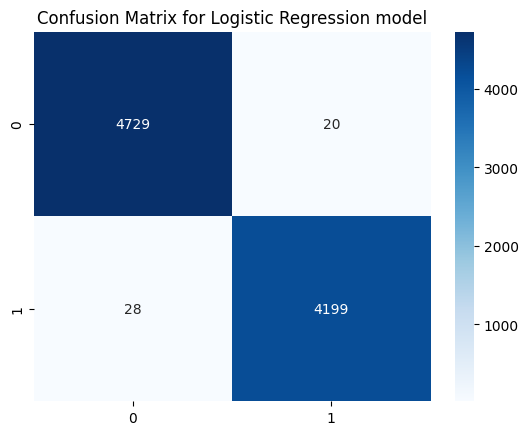

In [65]:
for model, name in [(best_lr, 'Logistic Regression')]:
    predictions = model.predict(X_test_vector)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, predictions)}")
    print(f"Classification Report:\n{classification_report(y_test, predictions)}")
    sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for Logistic Regression model')
    plt.show()

In [66]:
best_rf = grid_rf.best_estimator_

Model: RandomForest Classifier
Accuracy: 0.9946524064171123
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4749
           1       1.00      0.99      0.99      4227

    accuracy                           0.99      8976
   macro avg       0.99      0.99      0.99      8976
weighted avg       0.99      0.99      0.99      8976



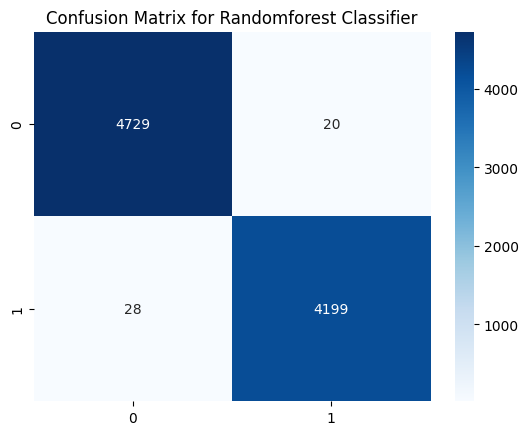

In [67]:
for model, name in [(best_lr, 'RandomForest Classifier')]:
    predictions = model.predict(X_test_vector)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, predictions)}")
    print(f"Classification Report:\n{classification_report(y_test, predictions)}")
    sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for Randomforest Classifier')
    plt.show()

In [68]:
cm = confusion_matrix(y_test, pred_svm)


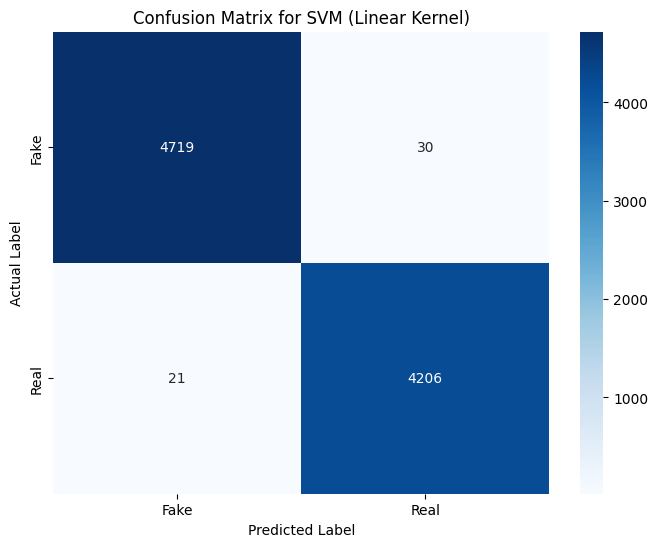

In [69]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix for SVM (Linear Kernel)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [70]:
Dt = confusion_matrix(y_test, pred_dt)

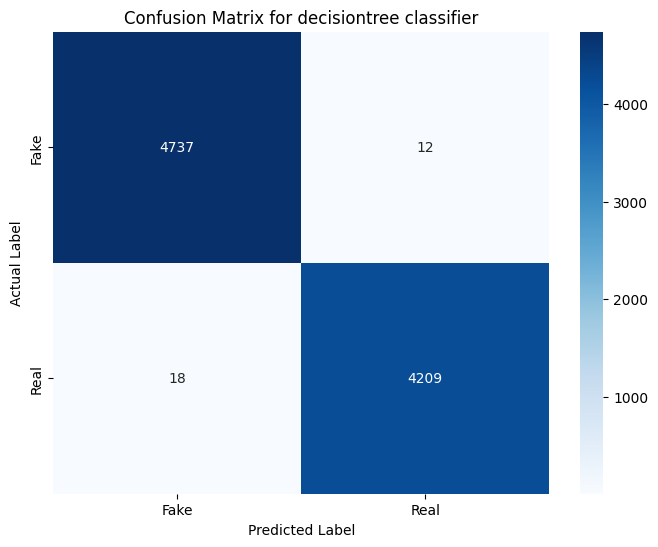

In [71]:
plt.figure(figsize=(8, 6))
sns.heatmap(Dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix for decisiontree classifier')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [72]:
Gb = confusion_matrix(y_test, pred_gb)

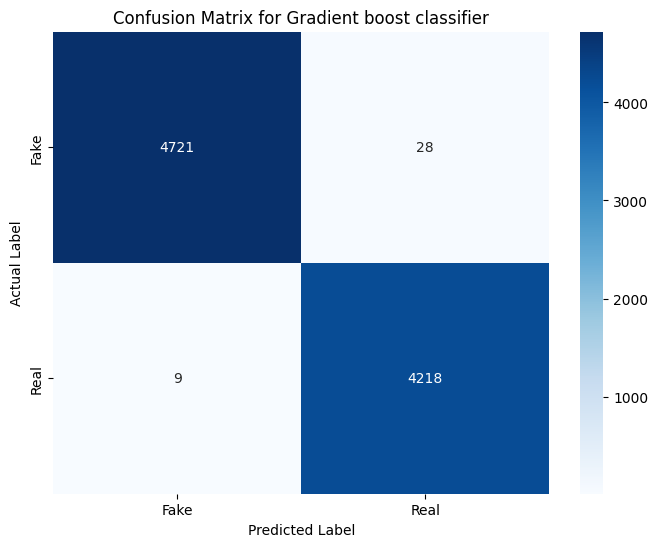

In [73]:
plt.figure(figsize=(8, 6))
sns.heatmap(Gb, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix for Gradient boost classifier')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [74]:
# Comparison between the models
accuracy_lr = accuracy_score(y_test, pred_lr)
accuracy_rf = accuracy_score(y_test, pred_rf)
accuracy_svm = accuracy_score(y_test, pred_svm)
accuracy_dt = accuracy_score(y_test, pred_dt)
accuracy_gb = accuracy_score(y_test, pred_gb)

models = ['Logistic Regression', 'Random Forest', 'SVM', 'Decision Tree', 'Gradient Boost']
accuracies = [accuracy_lr, accuracy_rf, accuracy_svm, accuracy_dt, accuracy_gb]

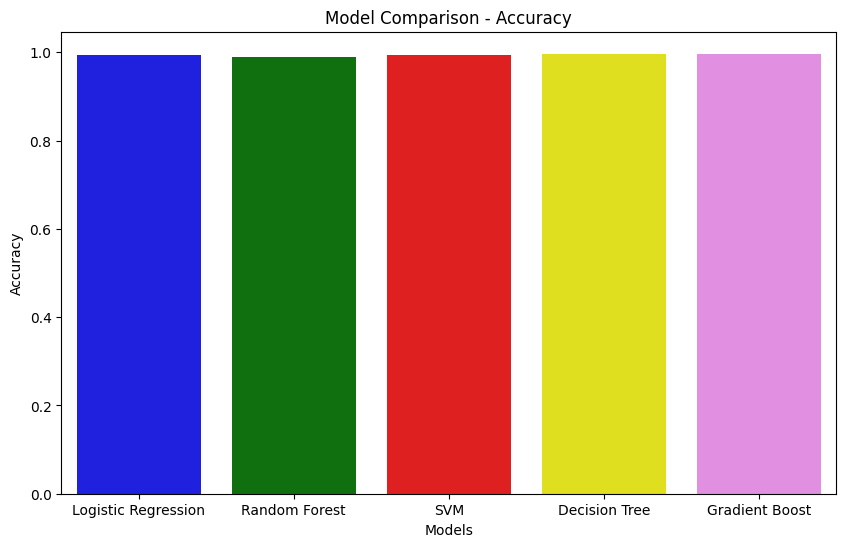

In [75]:
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette=['blue', 'green', 'red', 'yellow', 'violet'])
plt.title('Model Comparison - Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

In [76]:
# roc curve visualization
from sklearn.metrics import roc_curve, roc_auc_score

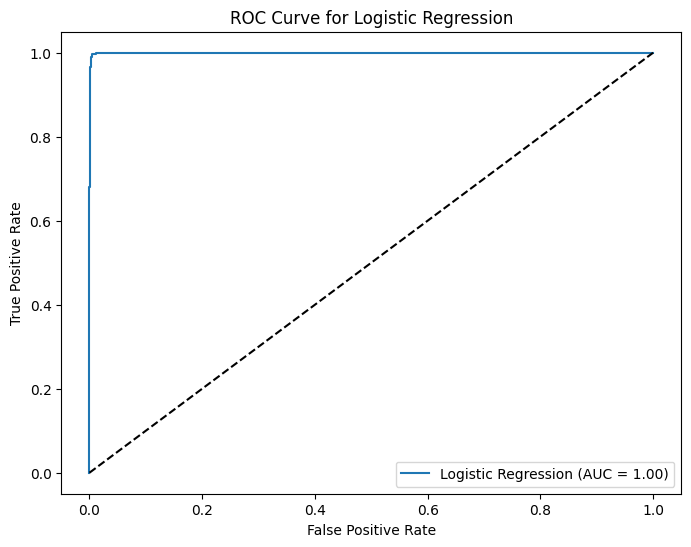

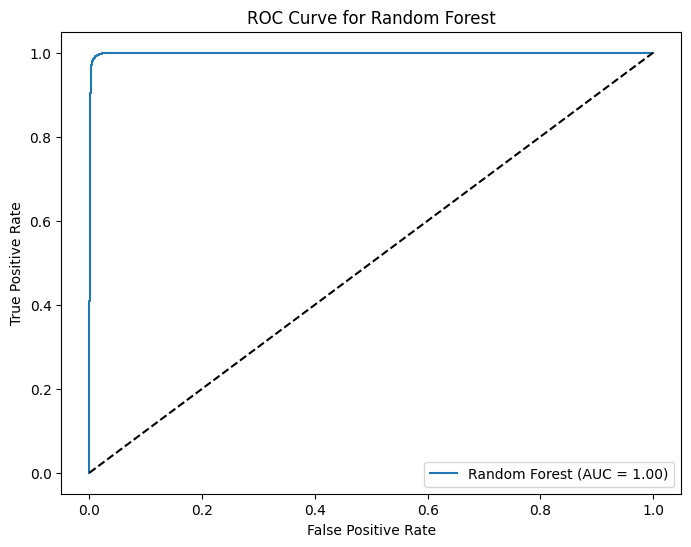

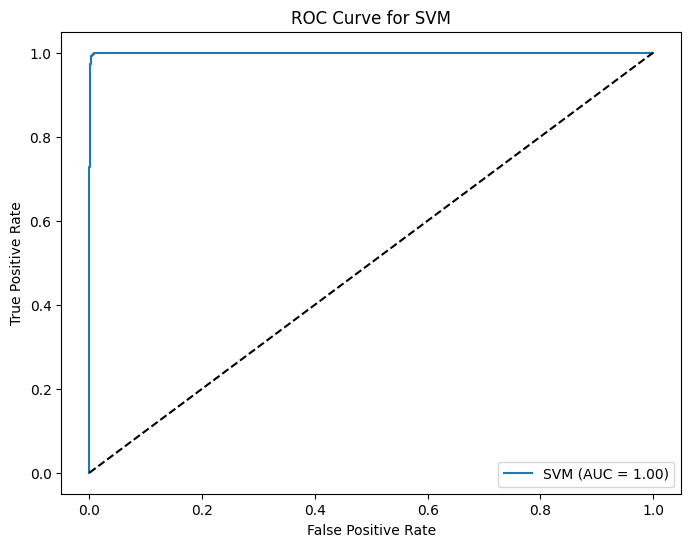

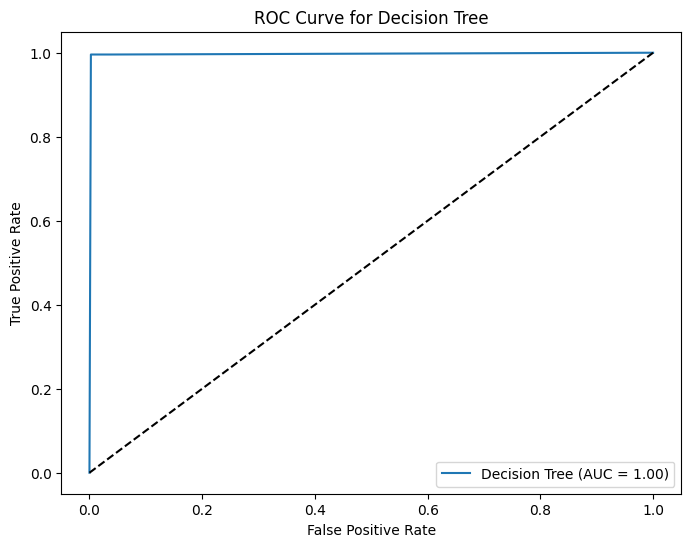

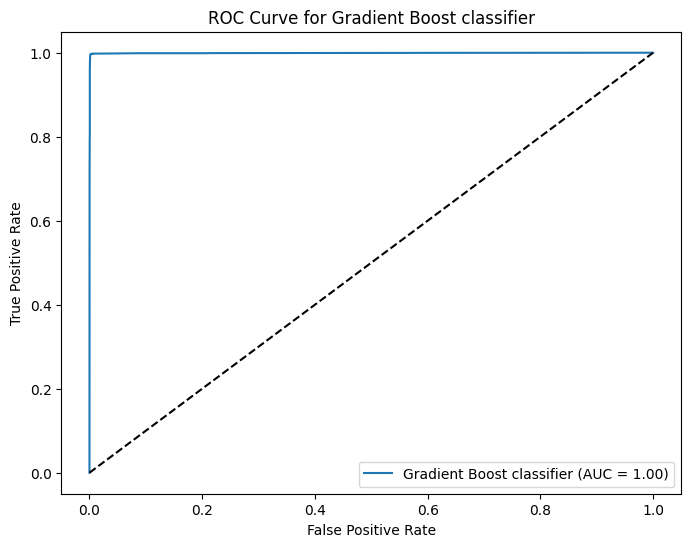

In [77]:
def plot_roc_curve(y_test, y_pred_prob, model_name):
  fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
  auc_score = roc_auc_score(y_test, y_pred_prob)

  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')
  plt.plot([0, 1], [0, 1], 'k--')
  plt.title(f'ROC Curve for {model_name}')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend()
  plt.show()

# For Logistic Regression
y_pred_prob_lr = grid_lr.predict_proba(X_test_vector)[:, 1]
plot_roc_curve(y_test, y_pred_prob_lr, 'Logistic Regression')

# For Random Forest
y_pred_prob_rf = grid_rf.predict_proba(X_test_vector)[:, 1]
plot_roc_curve(y_test, y_pred_prob_rf, 'Random Forest')

# For svm
y_pred_prob_svm = grid_svm.decision_function(X_test_vector)
plot_roc_curve(y_test, y_pred_prob_svm, 'SVM')

# For Decision Tree
y_pred_prob_dt = grid_dt.predict_proba(X_test_vector)[:, 1]
plot_roc_curve(y_test, y_pred_prob_dt, 'Decision Tree')

# For Gradient Boost Classifier
y_pred_prob_gb = grid_gb.predict_proba(X_test_vector)[:, 1]
plot_roc_curve(y_test, y_pred_prob_gb, 'Gradient Boost classifier')


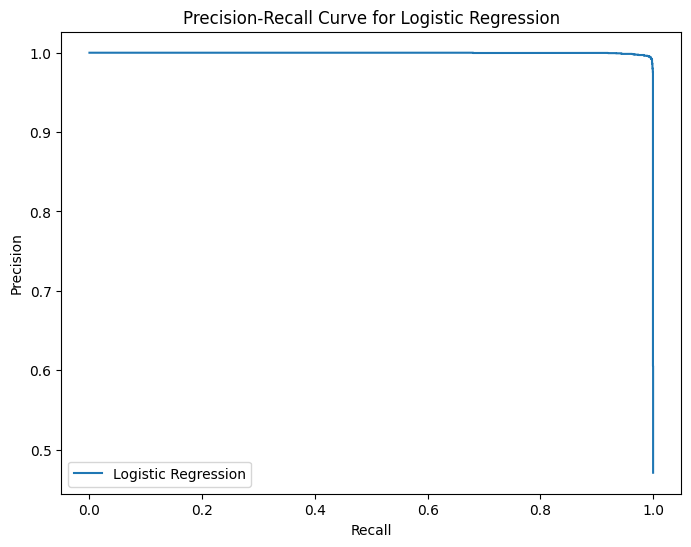

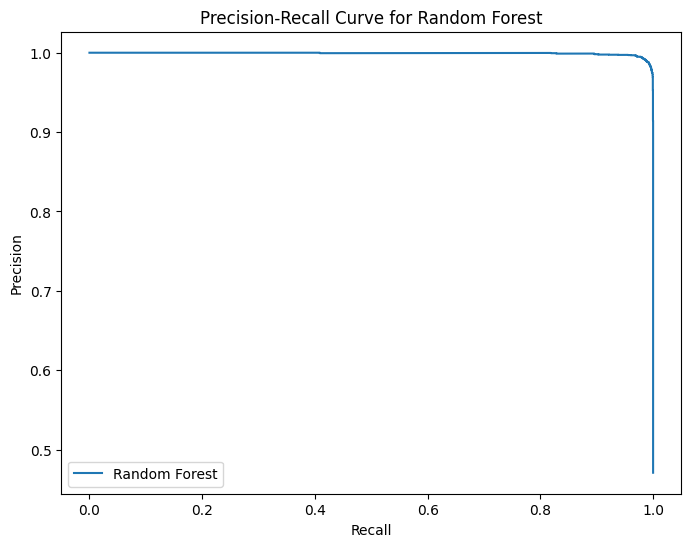

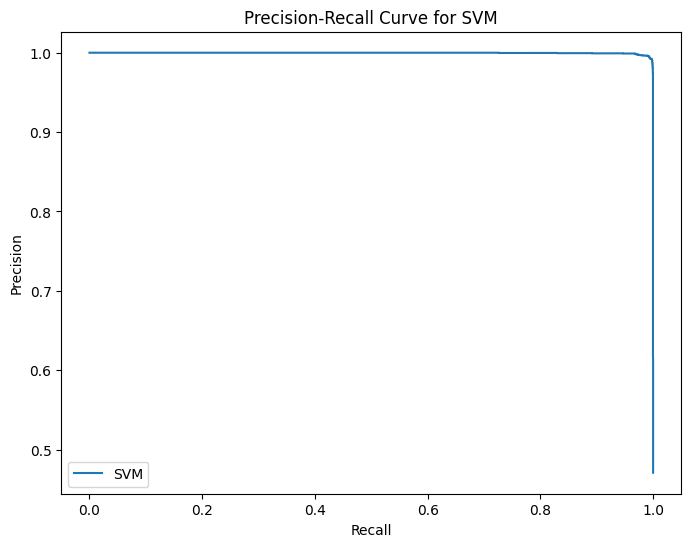

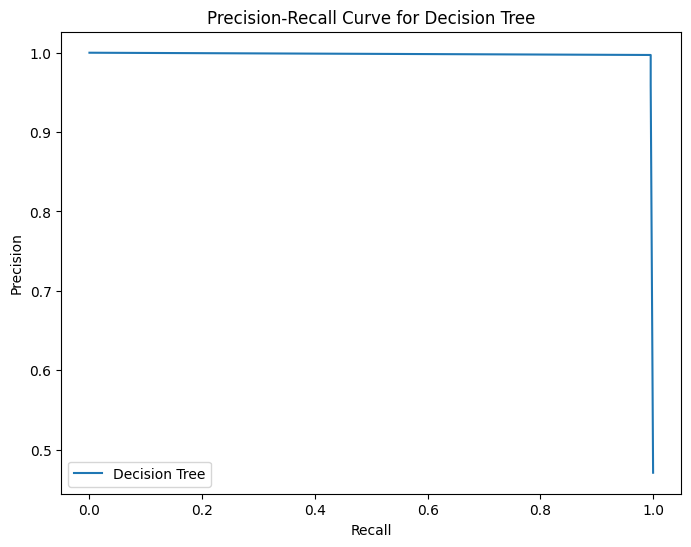

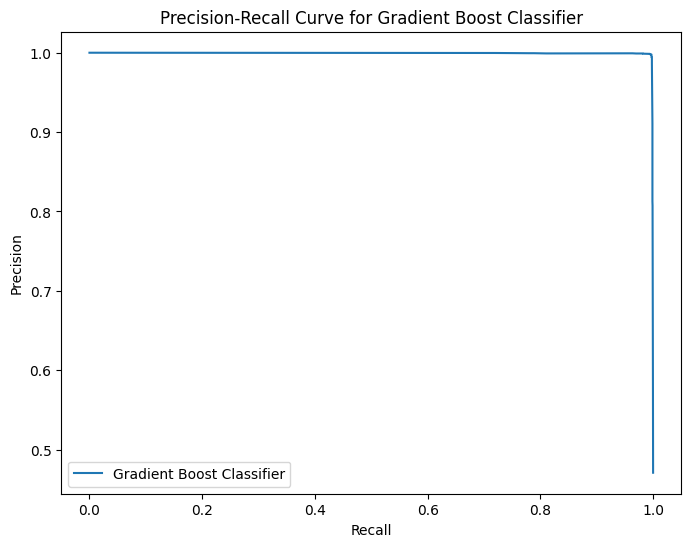

In [78]:
# Precision Recall Curve
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_curve(y_test, y_pred_prob, model_name):
  precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

  plt.figure(figsize=(8, 6))
  plt.plot(recall, precision, label=f'{model_name}')
  plt.title(f'Precision-Recall Curve for {model_name}')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.legend()
  plt.show

plot_precision_recall_curve(y_test, y_pred_prob_lr, 'Logistic Regression')
plot_precision_recall_curve(y_test, y_pred_prob_rf, 'Random Forest')
plot_precision_recall_curve(y_test, y_pred_prob_svm, 'SVM')
plot_precision_recall_curve(y_test, y_pred_prob_dt, 'Decision Tree')
plot_precision_recall_curve(y_test, y_pred_prob_gb, 'Gradient Boost Classifier')

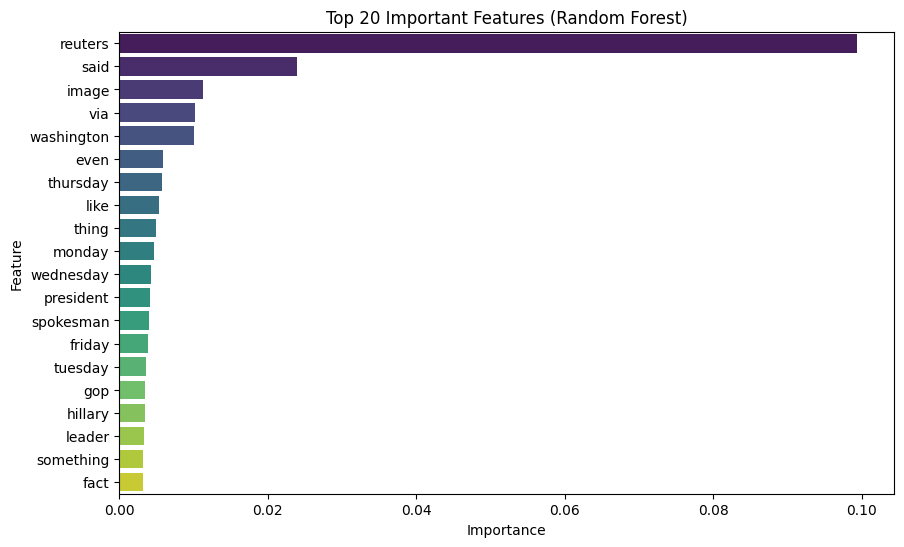

In [79]:
# Feature Importance visualization for random forest
feature_importances = grid_rf.best_estimator_.feature_importances_
features = vectorizer.get_feature_names_out()

feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Top 20 Important Features (Random Forest)')
plt.show()

**Testing the model**

In [80]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Real News"

def manual_testing(news):
    testing_news = {"text": [news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["cleaned_text"] = new_def_test["text"].apply(preprocess_text)
    new_x_test = new_def_test["cleaned_text"]
    new_x_test_vector = vectorizer.transform(new_x_test)
    pred_LR = grid_lr.predict(new_x_test_vector)
    pred_DT = grid_dt.predict(new_x_test_vector)
    pred_GB = grid_gb.predict(new_x_test_vector)
    pred_RF = grid_rf.predict(new_x_test_vector)
    pred_SVM = grid_svm.predict(new_x_test_vector)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGB Prediction: {} \nRF Prediction: {} \nSVM Prediction: {}".format(output_lable(pred_LR[0]),
                                                                                                                                 output_lable(pred_DT[0]),
                                                                                                                              output_lable(pred_GB[0]),
                                                                                                                              output_lable(pred_RF[0]),
                                                                                                                              output_lable(pred_SVM[0])))

In [81]:
data['cleaned_text'][10]

'sacramento calif reuters california would become first u state require farmer pay overtime field worker fruit picker bill approved legislature monday sent democratic governor jerry brown approval bill passed mostly partyline vote would phase overtime pay farmworkers small farm employ fewer worker would additional three year phase pay signed law brown california largest u agricultural producer would first state country require farmer pay overtime laborer work eight hour day hour week governor said sign measure bill culmination decade lobbying pressure united farmworkers union democraticcontrolled legislature rejected version bill earlier year supporter amended phase overtime rule slowly opponent said requiring farmer pay overtime could damage state agricultural economy worker toil hour week harvest season go month without pay time year predicted farmer would forced cut worker hour hour week avoid pay timeandahalf doubletime overtime supporter mostly democrat said issue one fairness far

In [82]:
news = str(input())                    # Example of real news
manual_testing(news)

sacramento calif reuters california would become first u state require farmer pay overtime field worker fruit picker bill approved legislature monday sent democratic governor jerry brown approval bill passed mostly partyline vote would phase overtime pay farmworkers small farm employ fewer worker would additional three year phase pay signed law brown california largest u agricultural producer would first state country require farmer pay overtime laborer work eight hour day hour week governor said sign measure bill culmination decade lobbying pressure united farmworkers union democraticcontrolled legislature rejected version bill earlier year supporter amended phase overtime rule slowly opponent said requiring farmer pay overtime could damage state agricultural economy worker toil hour week harvest season go month without pay time year predicted farmer would forced cut worker hour hour week avoid pay timeandahalf doubletime overtime supporter mostly democrat said issue one fairness farm

In [89]:
data['cleaned_text'][107]

'stunning last minute power grab obama administration day left presidency department homeland security released statement evening officially declaring state election system critical infrastructure statement dhs secretary jeh johnson defines election infrastructure storage facility polling place centralized vote tabulation location voter registration database voting machine system manage election process pretty much everythingi reached determination election infrastructure formal enduring basis priority cybersecurity assistance protection department homeland security provides range private public sector entity election infrastructure mean storage facility polling place centralized vote tabulation location used support election process information communication technology include voter registration database voting machine system manage election process report display result behalf state local government given vital role election play country clear certain system asset election infrastruc

In [90]:
news = str(input())                    # Example of fake news
manual_testing(news)

stunning last minute power grab obama administration day left presidency department homeland security released statement evening officially declaring state election system critical infrastructure statement dhs secretary jeh johnson defines election infrastructure storage facility polling place centralized vote tabulation location voter registration database voting machine system manage election process pretty much everythingi reached determination election infrastructure formal enduring basis priority cybersecurity assistance protection department homeland security provides range private public sector entity election infrastructure mean storage facility polling place centralized vote tabulation location used support election process information communication technology include voter registration database voting machine system manage election process report display result behalf state local government given vital role election play country clear certain system asset election infrastruct